# Datenbeschaffung

In [1]:
import psycopg2

# Verbindung zur PostgreSQL-Datenbank herstellen
connection = None 

try:
    connection = psycopg2.connect(
        host="130.61.234.133",      
        port="5432",                
        database="crawler_db",      
        user="crawler_user",          
        password="crawler_password" 
    )
    print("Verbindung zur Datenbank erfolgreich hergestellt.")
    
    # Cursor für SQL-Befehle
    cursor = connection.cursor()

    ## Beerbrands
    # SQL-Abfrage
    cursor.execute("SELECT * FROM beerbrands")

    # Alle Zeilen der Abfrageergebnisse abrufen
    data_beerbrands = cursor.fetchall()

    ## Beers
    cursor.execute("SELECT * FROM beers")
    data_beers = cursor.fetchall()

    ## Formats
    cursor.execute("SELECT * FROM formats")
    data_formats = cursor.fetchall()

    ## Prices
    cursor.execute("SELECT * FROM prices")
    data_prices = cursor.fetchall()

    ## Resellers
    cursor.execute("SELECT * FROM resellers")
    data_resellers = cursor.fetchall()

     ## Resellers
    cursor.execute("SELECT * FROM beer_brand_match")
    data_beer_brand_match = cursor.fetchall()

    #for zeile in daten:
        #print(zeile)
    
except Exception as error:
    print(f"Fehler beim Verbinden zur Datenbank: {error}")
    
finally:
    # Verbindung schließen, falls sie geöffnet wurde
    if connection is not None:
        cursor.close()
        connection.close()
        print("Verbindung zur Datenbank geschlossen.")



Verbindung zur Datenbank erfolgreich hergestellt.
Verbindung zur Datenbank geschlossen.


In [2]:
import pandas as pd

## Beerbrands
# Umwandlung in ein DataFrame
data_beerbrands = pd.DataFrame(data_beerbrands, columns=['brand_id', 'brand', 'id'])
#display(data_beerbrands)
print('beerbrands:', data_beerbrands.columns.tolist())

## Beers
data_beers = pd.DataFrame(data_beers, columns=['beer_id', 'name', 'alcohol_percentange'])
#display(data_beers)
print('beers:', data_beers.columns.tolist())

## Formats
data_formats = pd.DataFrame(data_formats, columns=['format_id', 'beer_id', 'quantity', 'unit'])
#display(data_formats)
print('formats:', data_formats.columns.tolist())

## Prices
data_prices = pd.DataFrame(data_prices, columns=['prices_id', 'beer_id', 'format_id', 'reseller_id', 'price', 'currency', 'date', 'url'])
#display(data_prices)
print('price:', data_prices.columns.tolist())

## Resellers
data_resellers = pd.DataFrame(data_resellers, columns=['reseller_id', 'reseller_name', 'zipcode'])
#display(data_resellers)
print('resellers:', data_resellers.columns.tolist())

## Resellers
data_beer_brand_match = pd.DataFrame(data_beer_brand_match, columns=['beer_id', 'brand_id'])
#display(data_resellers)
print('beer_brand_match:', data_beer_brand_match.columns.tolist())

beerbrands: ['brand_id', 'brand', 'id']
beers: ['beer_id', 'name', 'alcohol_percentange']
formats: ['format_id', 'beer_id', 'quantity', 'unit']
price: ['prices_id', 'beer_id', 'format_id', 'reseller_id', 'price', 'currency', 'date', 'url']
resellers: ['reseller_id', 'reseller_name', 'zipcode']
beer_brand_match: ['beer_id', 'brand_id']


In [3]:
# Merge (Left Join) durchführen
merge_beers = pd.merge(data_beers, data_prices, on='beer_id', how='left')
merge_beers = pd.merge(merge_beers, data_formats, on='format_id', how='left')
merge_beers = pd.merge(merge_beers, data_resellers, on='reseller_id', how='left')
merge_beers = merge_beers.rename(columns={'beer_id_x': 'beer_id'})
merge_beers = pd.merge(merge_beers, data_beer_brand_match, on='beer_id', how='left')
merge_beers = pd.merge(merge_beers, data_beerbrands, on='brand_id', how='left')

In [4]:
merge_beers = merge_beers.drop(columns=['beer_id_y', 'prices_id', 'format_id', 'reseller_id', 'brand_id', 'id'])
merge_beers = merge_beers.rename(columns={'beer_id_x': 'beer_id'})
merge_beers = merge_beers.reset_index(drop=True)
#display(merge_beers)
#print(merge_beers.count())


# Datenvalidierung

In [5]:
# Alle Daten mit Unbekannten Namen Löschen
#display(merge_beers[(merge_beers['name'] == 'Unknown') | (merge_beers['name'].isna())])

# Einträge filtern
filter_condition = (merge_beers['name'] == 'Unknown') | (merge_beers['name'].isna())

# Einträge löschen
merge_beers = merge_beers[~filter_condition]


In [6]:
# Alle Daten mit Unbekannten Alkoholgehalt Löschen
#filtered_df= merge_beers[(merge_beers['alcohol_percentange'] == 'Unknown') | (merge_beers['alcohol_percentange'].isna())]
#count_per_reseller = filtered_df.groupby('reseller_name').size().reset_index(name='count')
#print(count_per_reseller)

# Einträge filtern
filter_condition = (merge_beers['alcohol_percentange'] == 'Unknown') | (merge_beers['alcohol_percentange'].isna()) | (merge_beers['alcohol_percentange'] == 0)

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [7]:
# Alle Daten mit fehlendem Preis Löschen
#display(merge_beers[(merge_beers['price'] == 'Unknown') | (merge_beers['price'].isna()) | (merge_beers['price'] == '')])

# Einträge filtern
filter_condition = (merge_beers['price'] == 'Unknown') | (merge_beers['price'].isna()) | (merge_beers['price'] == '')

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [8]:
# Alle Daten mit fehlender Mengenangabe Löschen
#display(merge_beers[(merge_beers['quantity'] == 'Unknown') | (merge_beers['quantity'].isna()) | (merge_beers['quantity'] == '')])

# Einträge filtern
filter_condition = (merge_beers['quantity'] == 'Unknown') | (merge_beers['quantity'].isna()) | (merge_beers['quantity'] == '')

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [9]:
# Alle Daten mit fehlender Mengeneinheit Löschen
#display(merge_beers[(merge_beers['unit'] == 'Unknown') | (merge_beers['unit'].isna()) | (merge_beers['unit'] == '')])
#print(merge_beers.groupby('unit').count())

# Einträge filtern
filter_condition = (merge_beers['unit'] == 'Unknown') | (merge_beers['unit'].isna()) | (merge_beers['unit'] == '') | (merge_beers['unit'] == ' x')

# Einträge löschen
merge_beers = merge_beers[~filter_condition]

In [10]:
merge_beers['ppl'] = merge_beers['price'] / merge_beers.apply(
    lambda row: row['quantity'] / 1000 if row['unit'] == 'ml' else row['quantity'], axis=1)

In [11]:
#display(merge_beers.count())

In [12]:

merge_beers['ppl'] = pd.to_numeric(merge_beers['ppl'], errors='coerce')

summary = merge_beers['ppl'].describe()
#print(summary)

In [13]:
# 5. und 95. Perzentil berechnen
percentile_5 = merge_beers['ppl'].quantile(0.05)
percentile_95 = merge_beers['ppl'].quantile(0.95)

# Filter auf den DataFrame anwenden, um Werte außerhalb der Perzentilgrenzen zu entfernen
filtered_merge_beers = merge_beers[(merge_beers['ppl'] >= percentile_5) & (merge_beers['ppl'] <= percentile_95)]

summary = filtered_merge_beers['ppl'].describe()
#print(summary)

In [14]:
# Liste der Spalten, die zur Identifizierung von Duplikaten verwendet werden sollen
duplicate_columns = [
    'beer_id',             
    'name',                   
    'alcohol_percentange',    
    'price',                  
    'currency',
    'date',               
    'quantity',               
    'unit',                   
    'reseller_name',                         
    'brand'                  
]

# Entfernen von Duplikaten basierend auf den angegebenen Spalten
filtered_merge_beers_unique = filtered_merge_beers.drop_duplicates(subset=duplicate_columns)

# Optional: Index zurücksetzen
filtered_merge_beers_unique.reset_index(drop=True, inplace=True)

# Ausgabe des bereinigten DataFrames
#print(filtered_merge_beers_unique)

In [15]:
#Stichtag
count_per_date = filtered_merge_beers_unique.groupby('date').size().reset_index(name='count')

print(count_per_date)

         date  count
0  2024-09-17    181
1  2024-09-18    729
2  2024-09-19   1129
3  2024-09-20   1107
4  2024-09-21   1194
5  2024-09-22   1017
6  2024-09-24    709
7  2024-09-25    718


## 2024-09-21 eignet sich am besten, da meiste Datenpunkte

In [16]:
# Sicherstellen, dass die 'date'-Spalte im richtigen Datumsformat vorliegt
filtered_merge_beers_unique['date'] = pd.to_datetime(filtered_merge_beers_unique['date'])

# Datum, das gefiltert werden soll
filter_date = pd.to_datetime('2024-09-21')

# Filterung des DataFrames nach dem gewünschten Datum
filtered_merge_beers_unique_date = filtered_merge_beers_unique[filtered_merge_beers_unique['date'] == pd.to_datetime(filter_date)]

/var/folders/zg/6lrjj7gx7z57b_y0l47686jr0000gn/T/ipykernel_18145/1387637835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merge_beers_unique['date'] = pd.to_datetime(filtered_merge_beers_unique['date'])


# Analyse von Preisen und Resellern mit Hypothesentest (ANOVA auf 5% Signifikanz)

In [17]:
# Neuer DataFrame mit nur den Spalten 'reseller_name' und 'ppl'
reseller_analysis = filtered_merge_beers_unique_date[['reseller_name', 'ppl']]

# Ergebnis anzeigen
#print(reseller_analysis)

In [18]:
reseller_counts_all = reseller_analysis.groupby('reseller_name').count()
print(reseller_counts_all)


                   ppl
reseller_name         
Banach             221
Biertaxi            27
Durstquelle          1
Flaschenpost       100
Flink               67
Getränke Hoffmann  176
Lidl                 5
Metro              266
Netto Online        13
Rewe               318


In [19]:
# Resseller mit signifikant wenig daten < 20
unwanted_resellers = ['Durstquelle', 'Lidl', 'Netto Online']

reseller_analysis = reseller_analysis[~reseller_analysis['reseller_name'].isin(unwanted_resellers)]

reseller_counts_all = reseller_analysis.groupby('reseller_name').count()
print(reseller_counts_all)


                   ppl
reseller_name         
Banach             221
Biertaxi            27
Flaschenpost       100
Flink               67
Getränke Hoffmann  176
Metro              266
Rewe               318


In [20]:
# Statistiken
reseller_summary = reseller_analysis.groupby('reseller_name').agg(
    count=('ppl', 'count'),        # Anzahl der Einträge
    mean=('ppl', 'mean'),          # Durchschnitt
    std=('ppl', 'std'),            # Standardabweichung
    min=('ppl', 'min'),            # Minimalwert
    max=('ppl', 'max'),            # Maximalwert
    median=('ppl', 'median'),      # Median
    sum=('ppl', 'sum')             # Summe
).reset_index()  # Index zurücksetzen, um 'reseller_name' als Spalte zu erhalten

display(reseller_summary)


,reseller_name,count,mean,std,min,max,median,sum
0,Banach,221,2.443893,0.509388,1.499000,3.570000,2.570000,540.100425
1,Biertaxi,27,2.568184,0.466478,1.725000,3.483333,2.638889,69.340960
2,Flaschenpost,100,2.098897,0.369999,1.399000,3.256061,1.999000,209.889679
3,Flink,67,2.543000,0.518214,1.380000,3.606061,2.580000,170.381010
4,Getränke Hoffmann,176,2.613871,0.438226,1.513889,3.559091,2.549000,460.041212
5,Metro,266,2.062153,0.461366,1.361000,3.595960,1.999000,548.532592
6,Rewe,318,2.166744,0.506428,1.380000,3.606061,2.100000,689.024620


In [21]:
from scipy import stats

# Filtere die Daten für jeden Reseller heraus
banach_ppl = reseller_analysis[reseller_analysis['reseller_name'] == 'Banach']['ppl']
biertaxi_ppl = reseller_analysis[reseller_analysis['reseller_name'] == 'Biertaxi']['ppl']
flaschenpost_ppl = reseller_analysis[reseller_analysis['reseller_name'] == 'Flaschenpost']['ppl']
flink_ppl = reseller_analysis[reseller_analysis['reseller_name'] == 'Flink']['ppl']
getraenke_hoffmann_ppl = reseller_analysis[reseller_analysis['reseller_name'] == 'Getränke Hoffmann']['ppl']
metro_ppl = reseller_analysis[reseller_analysis['reseller_name'] == 'Metro']['ppl']
rewe_ppl = reseller_analysis[reseller_analysis['reseller_name'] == 'Rewe']['ppl']

# ANOVA-Test 
anova_result = stats.f_oneway(
    banach_ppl,
    biertaxi_ppl,
    flaschenpost_ppl,
    flink_ppl,
    getraenke_hoffmann_ppl,
    metro_ppl,
    rewe_ppl
)

# Ergebnisse 
print(f"F-Statistik: {anova_result.statistic:.4f}")
print(f"p-Wert: {anova_result.pvalue:.4f}")

# Signifikanz
if anova_result.pvalue < 0.05:
    print("Es gibt signifikante Unterschiede im Preis pro Liter zwischen den Resellern.")
else:
    print("Es gibt keine signifikanten Unterschiede im Preis pro Liter zwischen den Resellern.")



F-Statistik: 38.4111
p-Wert: 0.0000
Es gibt signifikante Unterschiede im Preis pro Liter zwischen den Resellern.


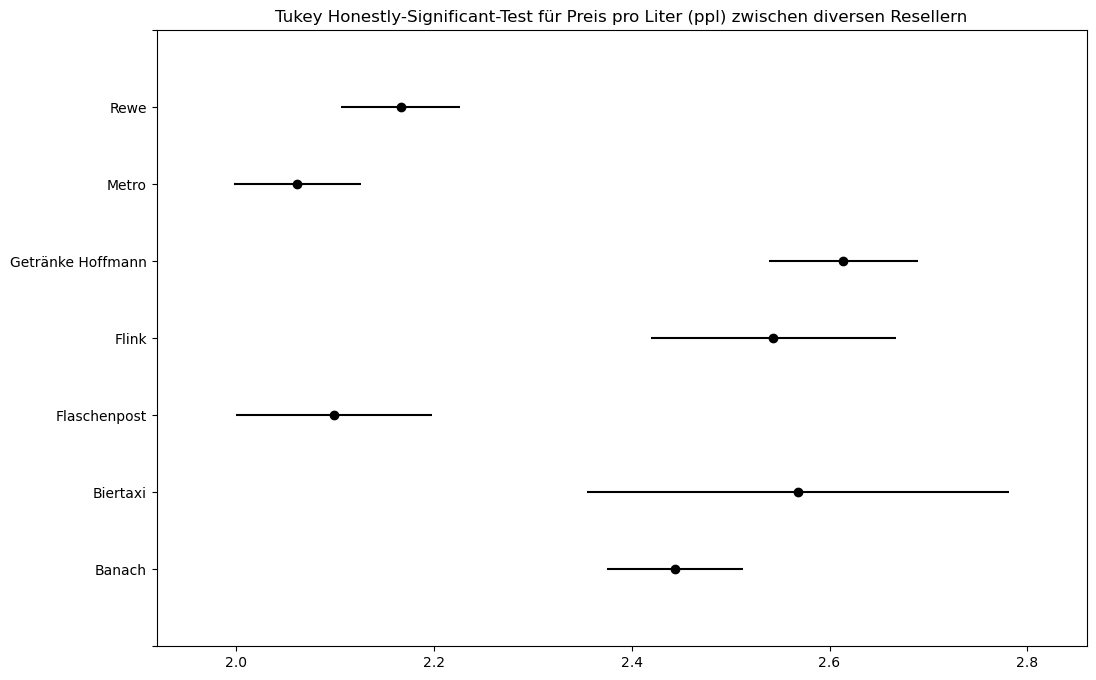

In [31]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey-HSD-Test
tukey_result = pairwise_tukeyhsd(endog=reseller_analysis['ppl'],
                                 groups=reseller_analysis['reseller_name'],
                                 alpha=0.05)

#print(tukey_result)

tukey_result.plot_simultaneous(figsize=(12, 8))
plt.title('Tukey Honestly-Significant-Test für Preis pro Liter (ppl) zwischen diversen Resellern')
plt.show()


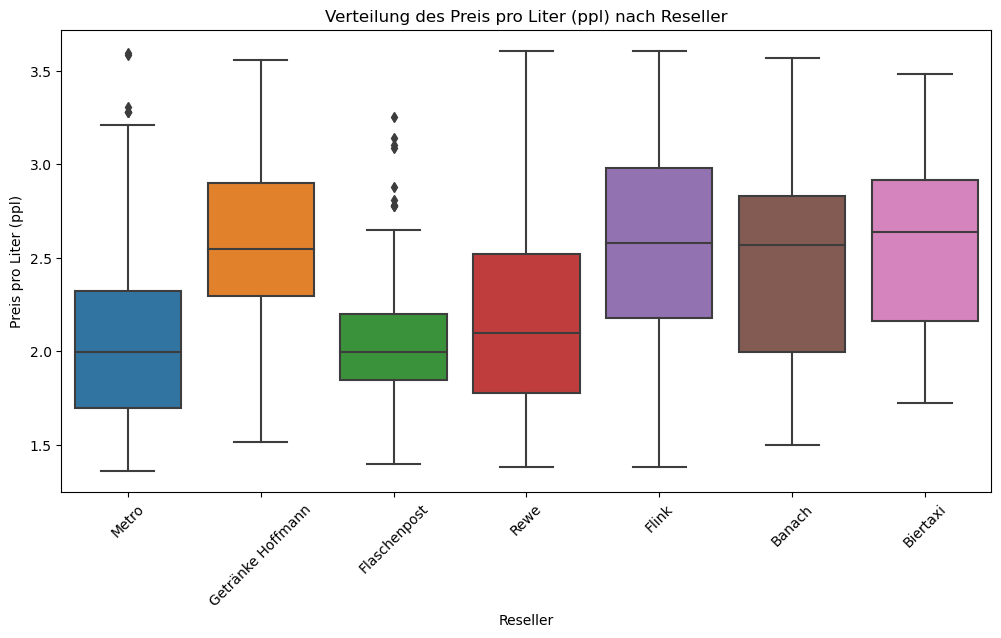

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='reseller_name', y='ppl', data=reseller_analysis)
plt.xticks(rotation=45)
plt.title('Verteilung des Preis pro Liter (ppl) nach Reseller')
plt.xlabel('Reseller')
plt.ylabel('Preis pro Liter (ppl)')
plt.show()


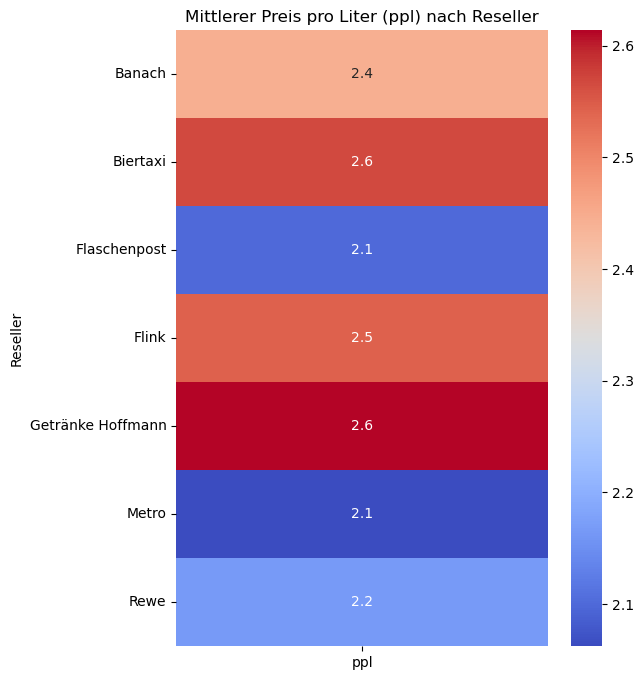

In [24]:
# Heatmap
reseller_mean = reseller_analysis.groupby('reseller_name')['ppl'].mean().reset_index()
reseller_mean_pivot = reseller_mean.pivot_table(index='reseller_name', values='ppl')
plt.figure(figsize=(6, 8))
sns.heatmap(reseller_mean_pivot, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mittlerer Preis pro Liter (ppl) nach Reseller')
plt.ylabel('Reseller')
plt.show()


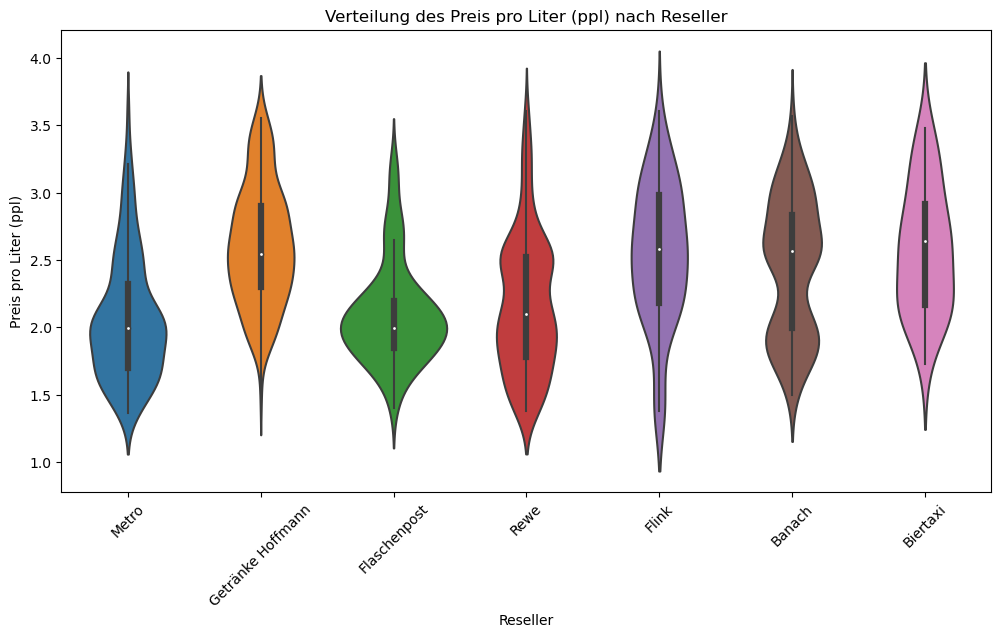

In [33]:
#Violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x='reseller_name', y='ppl', data=reseller_analysis)
plt.xticks(rotation=45)
plt.title('Verteilung des Preis pro Liter (ppl) nach Reseller')
plt.xlabel('Reseller')
plt.ylabel('Preis pro Liter (ppl)')
plt.show()


In [26]:
#pip install scikit_posthocs

import pandas as pd
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn

# Beispiel-Daten: DataFrame `df` mit 'reseller_name' und 'ppl'
# Kruskal-Wallis-Test für den Median
kruskal_result = stats.kruskal(*[group["ppl"].values for name, group in reseller_analysis.groupby("reseller_name")])
print(f"Kruskal-Wallis Test: H-Statistik = {kruskal_result.statistic}, p-Wert = {kruskal_result.pvalue}")

# Wenn signifikant, dann Dunn-Test als Post-Hoc-Test
if kruskal_result.pvalue < 0.05:
    dunn_result = posthoc_dunn(reseller_analysis, val_col="ppl", group_col="reseller_name", p_adjust="bonferroni")
    print(dunn_result)
